### SVM
#### iris 분류

- from sklearn import svm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris = datasets.load_iris()

In [3]:
x_data = iris.data[:,:2] # 꽃받침(sepal)의 길이와 너비
y_data = iris.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.7, test_size = 0.3, random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 2) (45, 2) (105,) (45,)


In [6]:
from sklearn import svm

In [7]:
clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = clf.predict(x_test)
cfmat = confusion_matrix(y_test, y_pred)
print(cfmat)

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]


In [9]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8


- #### linear

In [11]:
clf_lin = svm.LinearSVC() # svm.SVC(kernel = "linear") 를 이용한 것과 유사
clf_lin.fit(x_train, y_train)

y_pred_lin = clf_lin.predict(x_test)

print(confusion_matrix(y_test, y_pred_lin))
print(accuracy_score(y_test, y_pred_lin))

[[17  0  0]
 [ 0  7  5]
 [ 0  6 10]]
0.7555555555555555


C:\Users\sjyt1\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


- #### radial basis function

In [14]:
clf_rbf = svm.SVC(kernel = "rbf", gamma = 0.5) 
clf_rbf.fit(x_train, y_train)

y_pred_rbf = clf_rbf.predict(x_test)

print(confusion_matrix(y_test, y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]
0.8


- #### polynomial kernel

In [15]:
clf_poly = svm.SVC(kernel = "poly", degree = 3) 
clf_poly.fit(x_train, y_train)

y_pred_poly = clf_poly.predict(x_test)

print(confusion_matrix(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))

[[17  0  0]
 [ 0  9  3]
 [ 0  7  9]]
0.7777777777777778


- #### 시각화

In [16]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [17]:
# 데이터 불러오기
"""x_data = iris.data[:,:2] # 꽃받침(sepal)의 길이와 너비
y_data = iris.target"""

'x_data = iris.data[:,:2] # 꽃받침(sepal)의 길이와 너비\ny_data = iris.target'

In [18]:
# 모델정의 및 피팅
models = (svm.SVC(kernel = "linear"),
         svm.LinearSVC(),
         svm.SVC(kernel = "rbf", gamma = 0.5),
         svm.SVC(kernel = "poly", degree = 3))
models = (clf.fit(x_train, y_train) for clf in models)

In [19]:
titles = ('SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

C:\Users\sjyt1\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


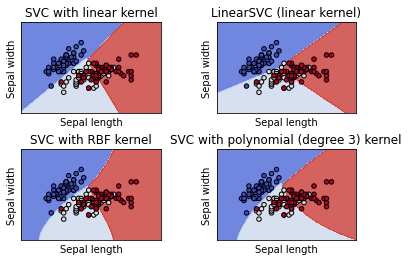

In [20]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_data[:, 0], x_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()